## Notebook to cluster eels spectrum from multiple locations.

In [1]:
import matplotlib.pylab as plt
import numpy as np
import Pyro5.api
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

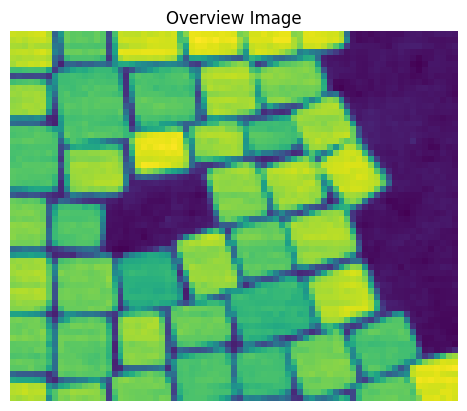

In [3]:


# Connect to the microscope server
uri = "PYRO:microscope.server@localhost:9091"
mic_server = Pyro5.api.Proxy(uri)

# Initialize microscope and register data
mic_server.initialize_microscope("STEM")
mic_server.register_data("data/test_stem.h5")

# Get overview image
array_list, shape, dtype = mic_server.get_overview_image()
im_array = np.array(array_list, dtype=dtype).reshape(shape)

# Display the overview image
plt.imshow(im_array)
plt.axis("off")
plt.title("Overview Image")
plt.show()



In [9]:

# Query spectra from 100 locations
spectra = []
locations = []
for x in range(10):
    for y in range(10):
        array_list, shape, dtype = mic_server.get_point_data(1, x, y)
        spectrum = np.array(array_list, dtype=dtype).reshape(shape)
        spectra.append(spectrum.flatten())  # Flatten each spectrum to make it 1D
        locations.append((x, y))

spectra = np.array(spectra)  # Convert list of spectra to a NumPy array




/Users/utkarshpratiush/opt/anaconda3/envs/dmclient_2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


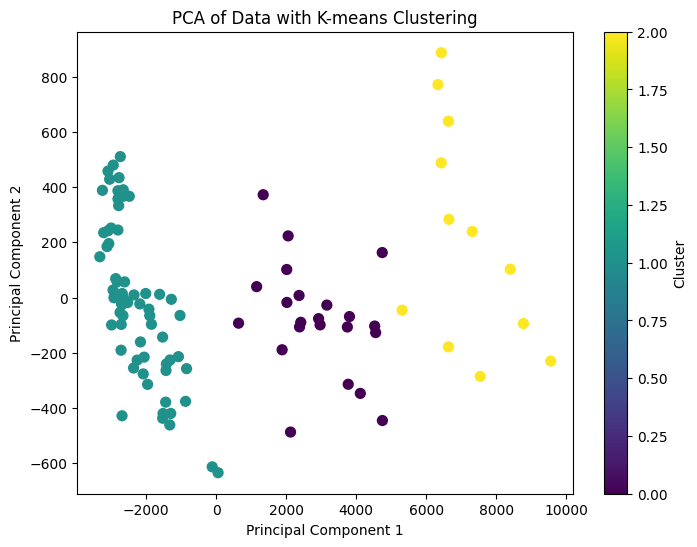

In [10]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(spectra)  # Now data_pca has shape (100, 2)

# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Plotting the PCA results with clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data with K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()